In [151]:
#As I looked for data to showcase my technical skills with Python, it occured to me that I had almost a decade worth of data from my own personal budget spreadsheets. This is a sample from December 2015.  

In [152]:
#Step 1 import all needed programs. Made sure they were all installed using pip. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [153]:
#Step 2 import my spreadsheet saved as a CSV file and print out the first 10 to make sure the data looks correct

December_2015 = pd.read_csv('December 2015 Finances.csv')
print(December_2015.head(10))

        Date Spending   Description           Mode        Category  Unnamed: 5
0        NaN      NaN           NaN             NaN             NaN        NaN
1  12/1/2015   $24.13  Eat 24 order          Credit            Food        NaN
2  12/1/2015    $6.75          Lyft          Credit  Transportation        NaN
3  12/3/2015    $7.47          Lyft          Credit  Transportation        NaN
4  12/3/2015    $4.32          Ebay          Credit            Misc        NaN
5  12/3/2015    $6.31          Ebay          Credit            Misc        NaN
6  12/4/2015    $8.53      In n Out          Credit            Food        NaN
7  12/4/2015    $3.50       Laundry  Claremont Cash            Misc        NaN
8  12/4/2015    $8.38          Lyft          Credit  Transportation        NaN
9  12/5/2015   $16.06        Target          Credit            Food        NaN


In [154]:
#Step 3 Remove Nan/null/empty values so that results aren't altered. The unnamed column and row 0 should not exist.
December_2015 = December_2015.dropna(subset=['Date'])
del December_2015['Unnamed: 5']
print(December_2015.head())

        Date Spending   Description   Mode        Category 
1  12/1/2015   $24.13  Eat 24 order  Credit            Food
2  12/1/2015    $6.75          Lyft  Credit  Transportation
3  12/3/2015    $7.47          Lyft  Credit  Transportation
4  12/3/2015    $4.32          Ebay  Credit            Misc
5  12/3/2015    $6.31          Ebay  Credit            Misc


In [155]:
#Check for duplicates. There's shouldn't be any. 
December_2015.duplicated()

1     False
2     False
3     False
4     False
5     False
      ...  
72    False
73    False
74    False
75    False
76    False
Length: 76, dtype: bool

In [156]:
#Step 4: String parse the spending category so that it's only numbers. Can't perform aggregate functions otherwise. 

December_2015.Spending = December_2015['Spending'].replace('[\$,]', '', regex = True)
December_2015.Spending = pd.to_numeric(December_2015.Spending)
print(December_2015.Spending.head())

1    24.13
2     6.75
3     7.47
4     4.32
5     6.31
Name: Spending, dtype: float64


In [157]:
#Step 5- get a feel of the data. Seperate specific columns and find the data that i want. 
spending = December_2015.Spending
average_spending = np.mean(spending)
total_spending = 0
for amount in spending:
    total_spending += amount
number_of_purchases = len(December_2015.Spending)
print("The total amount spent in December of 2015 is $"+  str(total_spending))
print("The average amount spent in December of 2015 is $"+ str(average_spending))
print("The total number of purchases made in December of 2015 was " + str(number_of_purchases))

The total amount spent in December of 2015 is $1632.61
The average amount spent in December of 2015 is $21.481710526315787
The total number of purchases made in December of 2015 was 76


In [158]:
# Some more aggregate data with spending 
median_spending = np.median(spending)
min = np.min(spending)
max = np.max(spending)
print(median,mode,min,max)

9.004999999999999 ModeResult(mode=array([5.]), count=array([8])) 0.75 180.0


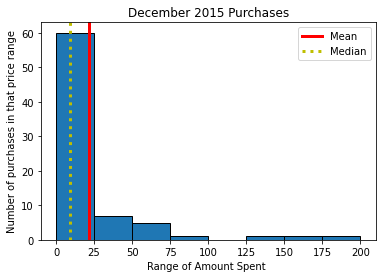

In [159]:
#Plot spending. 

plt.hist(spending, range=(0, 200), bins=8,  edgecolor='black')
plt.title("December 2015 Purchases")
plt.ylabel("Number of purchases in that price range")
plt.xlabel("Range of Amount Spent ")
plt.axvline(average_spending, color='r', linestyle='solid', linewidth=3, label="Mean")
plt.axvline(median_spending, color='y', linestyle='dotted', linewidth=3, label="Median")
plt.legend()

plt.show()

#Since my min is .75 and my max is 180, a range of 0 to 200 seems fitting. Findings: The majority of my purchases were under the $25 range 

In [160]:
# Start categorizing as I please. I want to know how much i spent in each category. 
print(December_2015['Category '].unique())

['Food' 'Transportation' 'Misc' 'Health' 'Fees' 'Clothing']


In [170]:
spending_by_category = December_2015.groupby('Category ').Spending.sum().reset_index()
print(spending_by_category)

        Category   Spending
0        Clothing     35.59
1            Fees    628.46
2            Food    354.31
3          Health    157.17
4            Misc    239.51
5  Transportation    217.57


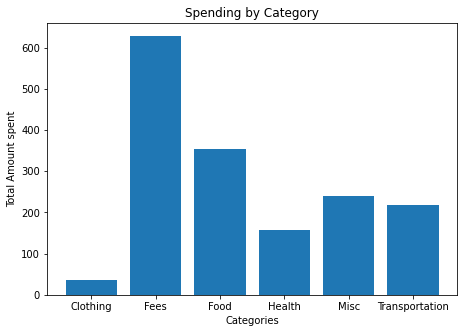

In [172]:
names = spending_by_category['Category ']
values = spending_by_category['Spending']

plt.figure(figsize=(25, 5))
plt.subplot(131)
plt.bar(names, values)
plt.title('Spending by Category')
plt.xlabel('Categories')
plt.ylabel('Total Amount spent')
plt.show()

In [203]:
#Specific merchants out of curiosity

In_n_out = December_2015[December_2015.Description == 'In n Out']
Ebay = December_2015[December_2015.Description == 'Ebay']
Target = December_2015[December_2015.Description == 'Target']
Lyft = December_2015[(December_2015.Description == 'Lyft')]

print('Total Amount Spent on In n Out = ' + str(In_n_out.Spending.sum()))
print('Total Amount Spent on Ebay = ' + str(Ebay.Spending.sum()))
print('Total Amount Spent on Target = ' + str(Target.Spending.sum()))
print('Total Amount Spent on Lyft = ' + str(Lyft.Spending.sum()))

Total Amount Spent on In n Out = 34.04
Total Amount Spent on Ebay = 10.629999999999999
Total Amount Spent on Target = 78.3
Total Amount Spent on Lyft = 74.01


In [204]:
# Je suis Fini 